In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.random import set_seed
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [67]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
x = np.load('/content/gdrive/MyDrive/Colab Notebooks/DataSet/new/clothes_photos.npy')
y = np.load('/content/gdrive/MyDrive/Colab Notebooks/DataSet/new/clothes_labels.npy')

In [78]:
x.shape

(1256, 200, 200, 3)

In [79]:
y.astype(int)

array([1, 1, 1, ..., 3, 3, 3])

In [80]:
y = np_utils.to_categorical(y - 1, 3)

In [81]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [82]:
y.shape

(1256, 3)

In [83]:
imgsize = 200

In [84]:
x=x/255

In [85]:
x

array([[[[0.5254902 , 0.5529412 , 0.62352943],
         [0.24313726, 0.27058825, 0.34509805],
         [0.24313726, 0.27058825, 0.34509805],
         ...,
         [1.        , 1.        , 0.98039216],
         [1.        , 1.        , 0.98039216],
         [1.        , 0.99607843, 0.99215686]],

        [[0.91764706, 0.94509804, 1.        ],
         [0.28627452, 0.3137255 , 0.38431373],
         [0.28627452, 0.3137255 , 0.38431373],
         ...,
         [1.        , 1.        , 0.98039216],
         [1.        , 1.        , 0.98039216],
         [1.        , 0.99607843, 0.99215686]],

        [[0.9764706 , 1.        , 1.        ],
         [0.54509807, 0.5803922 , 0.64705884],
         [0.54509807, 0.5803922 , 0.64705884],
         ...,
         [1.        , 1.        , 0.9843137 ],
         [1.        , 1.        , 0.9843137 ],
         [1.        , 1.        , 0.99215686]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

In [88]:
set_seed(42) #setting the seed
cnn = Sequential()

# The convolutional layers
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(imgsize,imgsize,3), kernel_regularizer=regularizers.l1(1e-5)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))

# The fully connected layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(Dropout(.20))
cnn.add(layers.Dense(3, activation='softmax'))

# Compile the model
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
model = cnn.fit(x_train,y_train, epochs=10, validation_split=0.2, # taking 20 percent of training set for validation
                  callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3))
cnn.save('model_cnn.h5')

Epoch 1/10
26/26 [==============================] - 52s 2s/step - loss: 1.0329 - accuracy: 0.4757 - val_loss: 0.8390 - val_accuracy: 0.5075
Epoch 2/10
26/26 [==============================] - 51s 2s/step - loss: 0.6233 - accuracy: 0.6538 - val_loss: 0.5404 - val_accuracy: 0.6318
Epoch 3/10
26/26 [==============================] - 51s 2s/step - loss: 0.5491 - accuracy: 0.6600 - val_loss: 0.4942 - val_accuracy: 0.7214
Epoch 4/10
26/26 [==============================] - 51s 2s/step - loss: 0.4847 - accuracy: 0.7335 - val_loss: 0.4939 - val_accuracy: 0.7264
Epoch 5/10
26/26 [==============================] - 53s 2s/step - loss: 0.4535 - accuracy: 0.7584 - val_loss: 0.4699 - val_accuracy: 0.7960
Epoch 6/10
26/26 [==============================] - 53s 2s/step - loss: 0.4421 - accuracy: 0.7858 - val_loss: 0.4145 - val_accuracy: 0.7811
Epoch 7/10
26/26 [==============================] - 52s 2s/step - loss: 0.4030 - accuracy: 0.7970 - val_loss: 0.3994 - val_accuracy: 0.8507
Epoch 8/10
26/26 [==

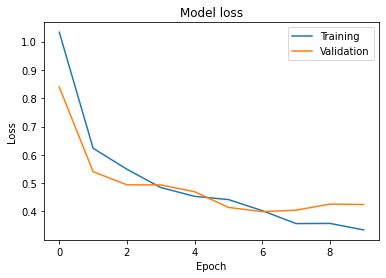

In [89]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [90]:
print("Accuracy : ", cnn.evaluate(x_test, y_test))

8/8 [==============================] - 4s 474ms/step - loss: 0.3348 - accuracy: 0.8611
Accuracy :  [0.33475494384765625, 0.8611111044883728]


In [91]:
# Prediction on the test image
cnn_pred = cnn.predict(x_test, verbose=1)
cnn_pred = np.argmax(cnn_pred, axis=1) # this will pick the value in an array having the maximum score

8/8 [==============================] - 4s 471ms/step


In [92]:
cnn_pred[7]

1

In [93]:
y_test.shape

(252, 3)

In [94]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

0

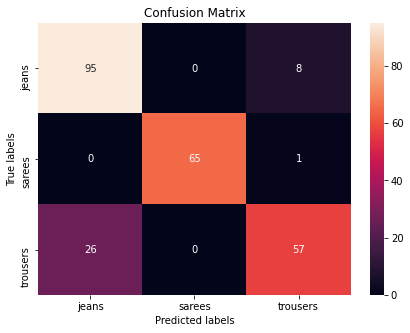

In [95]:
# Confusion matrix for results
cm = confusion_matrix(rounded_labels, cnn_pred)

fig, ax= plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); # annot=True to annotate cells. 'fmt' prevents the numbers from going to scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['jeans','sarees','trousers']); ax.yaxis.set_ticklabels(['jeans','sarees','trousers']);

In [100]:
test_labels=rounded_labels.tolist() # converting the test_labels into a list 

# Creating a function which picks random images and identifies the class to which the image belongs
def get_image_and_class(size):
  idx = np.random.randint(len(x_test), size=size) # generating a random image from the test data
  for i in range(len(idx)):
    plt.imshow(x_test[idx,:][i]) 
    plt.show()
    
  # Print the class of the random image picked above
    if test_labels[idx[i]] == 1:
      print('This is a sarees!')
    elif test_labels[idx[i]] == 0:
      print('This is a jeans!')
    elif test_labels[idx[i]] == 2:
      print('This is a trousers!')

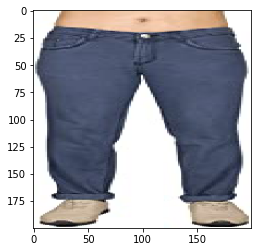

This is a jeans!


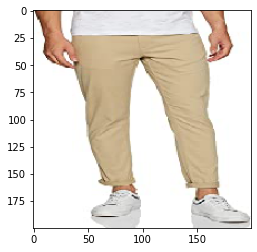

This is a trousers!


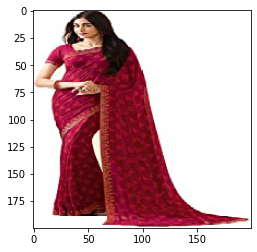

This is a sarees!


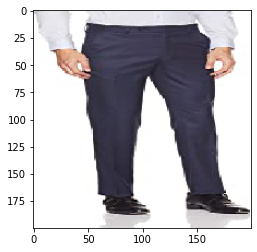

This is a trousers!


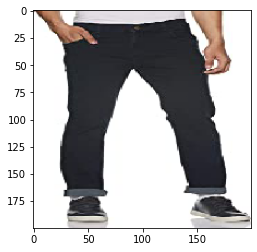

This is a jeans!


In [101]:
get_image_and_class(5)